<a href="https://colab.research.google.com/github/zakia16/Machine-Learning-Projects/blob/main/Email_spam_or_ham_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv("spam.csv", encoding="latin-1")

# Display the first few rows of the dataset to understand its structure
data.head()

Saving spam.csv to spam (2).csv


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1": "label", "v2": "text"})
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#Step 1 : Basic Statistics


In [ ]:
basic_statistics= data.describe()
basic_statistics

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#Step 2: Checking for Missing Values

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values

label    0
text     0
dtype: int64

#step 3. Exploratory Data Analysis (EDA)

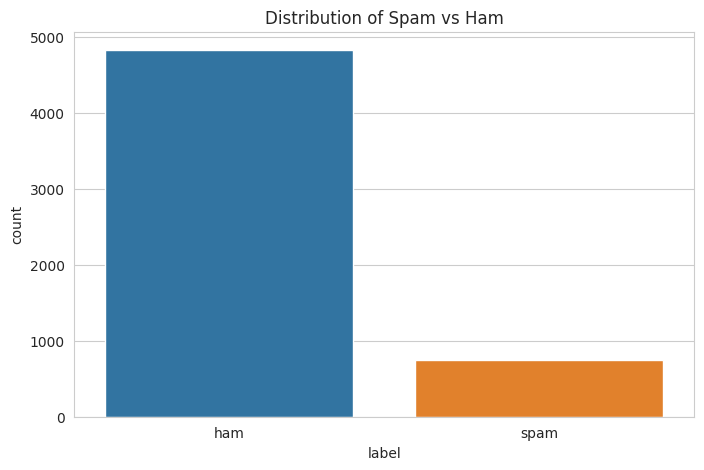

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style("whitegrid")

# Plot the distribution of the target variable 'Survived'
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam vs Ham')
plt.show()

In [ ]:
def calculate_imbalance_ratio(num_majority_class, num_minority_class):
    imbalance_ratio = num_majority_class / num_minority_class
    return imbalance_ratio

# Example usage:
num_majority_class = 4800
num_minority_class = 800

imbalance_ratio = calculate_imbalance_ratio(num_majority_class, num_minority_class)
print(f"Imbalance Ratio: {imbalance_ratio}")

Imbalance Ratio: 6.0


**Problem** : This means that the majority class is 6 times more prevalent than the minority class in the dataset.This level of class imbalance can pose challenges for machine learning models, as they may be biased towards predicting the majority class.

#Model Training : Bag of Words

In [ ]:
from sklearn.model_selection import train_test_split
# Load the dataset of email texts
X = data['text']

# Load the labels for the emails (1 for spam, 0 for not spam)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert the email texts to numerical vectors using a bag-of-words representation

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the documents
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '000pes', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

In [ ]:
feature_names.size

7735

In [ ]:
# Print the transformed matrix (Bag-of-Words representation)
print("Bag-of-Words representation:")
print(X)

Bag-of-Words representation:
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


Deep learning: Neural Net  
Builds a deep learning model using a multi-layer perceptron (MLP) classifier, which is a type of neural network that is well-suited for classifying text data.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build the deep learning model using a multi-layer perceptron classifier
model = MLPClassifier(hidden_layer_sizes=(10, 5),max_iter=200, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

#Evaluate the model's performance using metrics like accuracy and classification report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9802690582959641
Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Use the model to make predictions on new emails
new_emails = ['Get rich quick!!', 'Hello, how are you doing?','Congratulations! You have won a prize. Claim it now']

# Transform the new emails using the same vectorizer
new_emails_vectorized = vectorizer.transform(new_emails)

# Make predictions
predictions = model.predict(new_emails_vectorized)

# Print the predictions
print('Predictions:', predictions)


Predictions: ['ham' 'ham' 'spam']


Using  multi-layer perceptron (MLP) classifier : accuracy: 0.98026

#Further Improvement? : Remove stop words

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df = data
# Preprocess text data
df["text"] = df["text"].str.lower()
df["text"] = df["text"].apply(word_tokenize)

#Remove stop words
stop_words = set(stopwords.words("english"))
df["text"] = df["text"].apply(lambda x: [word for word in x if word not in stop_words])
df["text"] = df["text"].apply(lambda x: " ".join(x))

In [ ]:
df.head()

,label,text
0,ham,"go jurong point , crazy .. available bugis n g..."
1,ham,ok lar ... joking wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor ... u c already say ...
4,ham,"nah n't think goes usf , lives around though"


Naive Bays

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])

#Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, df["label"], test_size=0.2, random_state=42)

#Train a classification model, such as Multinomial Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

#Evaluate the model's performance using metrics like accuracy and classification report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9748878923766816
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       965
        spam       0.90      0.92      0.91       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.95      1115
weighted avg       0.98      0.97      0.98      1115



In [ ]:
# Use the model to make predictions on new emails
new_emails = ['Get rich quick!!', 'Hello, how are you doing?','Congratulations! You have won a prize. Claim it now']

# Transform the new emails using the same vectorizer
new_emails_vectorized = vectorizer.transform(new_emails)

# Make predictions
predictions = classifier.predict(new_emails_vectorized)

# Print the predictions
print('Predictions:', predictions)

Predictions: ['ham' 'ham' 'spam']


Using Naive Bays accuracy dropped, accuracy: 0.974

Deep learning:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build the deep learning model using a multi-layer perceptron classifier
model = MLPClassifier(hidden_layer_sizes=(10, 5),max_iter=200, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

#Evaluate the model's performance using metrics like accuracy and classification report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9802690582959641
Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Deep learning + stop words removal : accuracy: 0.980

#Further Improvement? : Oversample
(Oversampling involves increasing the number of instances in the minority class by either replicating existing instances or generating synthetic instances)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

#Use RandomOverSampler to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Build the deep learning model using a multi-layer perceptron classifier
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=200, random_state=42)

# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)

#Evaluate the model's performance using metrics like accuracy and classification report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Create a cross-validation object (StratifiedKFold is suitable for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and print the results
cv_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

Accuracy: 0.9829596412556054
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Cross-Validation Scores: [0.98206278 0.97309417 0.95964126 0.95067265 0.94618834]
Mean Accuracy: 0.9623318385650224


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Train a classification model, such as Multinomial Naive Bayes
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#Evaluate the model's performance using metrics like accuracy and classification report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

#Train a classification model, such as Multinomial Naive Bayes
classifier = LinearSVC()
classifier.fit(X_train, y_train)

#Evaluate the model's performance using metrics like accuracy and classification report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

#Use RandomOverSampler to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

#Train a classification model, such as Random Forrest
# Build the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

#Evaluate the model's performance using metrics like accuracy and classification report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Summary:

Naive Bays Algo(after stop words removal): 0.977  
Logistic Regression(after stop words removal):0.980   
Linear SVC Algo(after stop words removal):0.980

Deep learning (without stop words removal): 0.980         
Deep learning (after stop words removal): 0.980   
Deep learning (after stop words removal+ resampling): 0.982, recall a little better     
**(for other models resampling not giving better performance)  